# Python basics / Numpy / Scipy crash course

Adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

Readapted by [Giorgos Sfikas](http://www.cs.uoi.gr/~sfikas/) for the Digital Image Processing course at [cse/uoi](http://www.cse.uoi.gr/), winter semester 2017-2018.

## Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### Python versions

There are currently two different supported versions of Python, 2.7 and 3.4. Somewhat confusingly, Python 3.0 introduced many backwards-incompatible changes to the language, so code written for 2.7 may not work under 3.4 and vice versa. For this class all code will use Python 2.7.

You can check your Python version at the command line by running `python --version`.

### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [2]:
x = 3
print(x, type(x))

(3, <type 'int'>)


In [3]:
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation;

4
2
6
9


In [4]:
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"

4
8


In [5]:
y = 2.5
print(type(y)) # Prints "<type 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<type 'float'>
(2.5, 3.5, 5.0, 6.25)


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [6]:
t, f = True, False
print(type(t)) # Prints "<type 'bool'>"

<type 'bool'>


Now we let's look at the operations:

In [7]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [8]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello, len(hello))

('hello', 5)


In [9]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


In [10]:
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello world 12


String objects have a bunch of useful methods; for example:

In [11]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                               # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/2/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [12]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

([3, 1, 2], 2)
2


In [13]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [14]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [15]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

('bar', [3, 1, 'foo'])


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists).

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [16]:
nums = list(range(5))# range is a built-in function that creates a list of integers
                     # (note that in Python 2 'range' returns a list object; in Python 3 'range' returns a generator object)
print(nums)          # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])     # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])      # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])      # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])       # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])     # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9]   # Assign a new sublist to a slice
print(nums)          # Prints "[0, 1, 8, 8, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Loops

You can loop over the elements of a list like this:

In [17]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [18]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: monkey


#### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [19]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [20]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [21]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [22]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [23]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [24]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [25]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

N/A
wet


In [26]:
del(d['fish'])        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [27]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A spider has 8 legs
A cat has 4 legs


If you want access to keys and their corresponding values, use the iteritems method:

In [28]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A spider has 8 legs
A cat has 4 legs


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [29]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [30]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [31]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [32]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))

3
2


_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [33]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))

#1: fish
#2: dog
#3: cat


Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [34]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

set([0, 1, 2, 3, 4, 5])


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [35]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])
print(d[(1, 2)])

<type 'tuple'>
5
1


In [36]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

### Functions

Python functions are defined using the `def` keyword. For example:

In [37]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [38]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


### Classes

The syntax for defining classes in Python is straightforward:

In [39]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print 'HELLO, %s!' % self.name.upper()
        else:
            print 'Hello, %s' % self.name

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [40]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [41]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

(<type 'numpy.ndarray'>, (3,), 1, 2, 3)
[5 2 3]


In [42]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [43]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
(1, 2, 4)


Numpy also provides many functions to create arrays:

In [44]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[ 0.  0.]
 [ 0.  0.]]


In [45]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[ 1.  1.]]


In [46]:
c = np.full((2,2), 7.) # Create a constant array
print(c)

[[ 7.  7.]
 [ 7.  7.]]


In [47]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[ 1.  0.]
 [ 0.  1.]]


In [48]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[ 0.7512097   0.61648818]
 [ 0.71403008  0.85476431]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [49]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [50]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [51]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [52]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

(array([5, 6, 7, 8]), (4,))
(array([[5, 6, 7, 8]]), (1, 4))
(array([[5, 6, 7, 8]]), (1, 4))


In [53]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print
print(col_r2, col_r2.shape)

(array([ 2,  6, 10]), (3,))

(array([[ 2],
       [ 6],
       [10]]), (3, 1))


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [54]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [55]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [56]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [57]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [58]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [59]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [60]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [61]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

(dtype('int64'), dtype('float64'), dtype('int64'))


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [62]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [63]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [64]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [65]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [66]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [67]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [68]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [69]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [70]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [71]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [72]:
v = np.array([[1,2,3]])
print(v) 
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [73]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [74]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [75]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [76]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [77]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [78]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [79]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [80]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [81]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Scipy.linalg

Package [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html) contains useful linear algebra functions, such as:

* Computing the inverse of a matrix
* Computing determinants
* Computing eigenvalues
* etc. ...

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [82]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [83]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

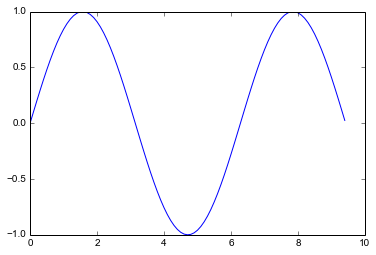

In [84]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

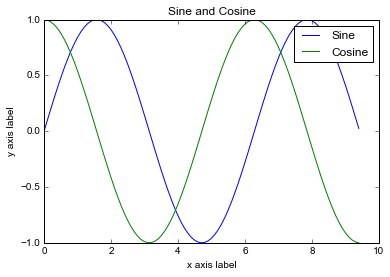

In [85]:
y_cos = np.cos(x)
y_sin = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

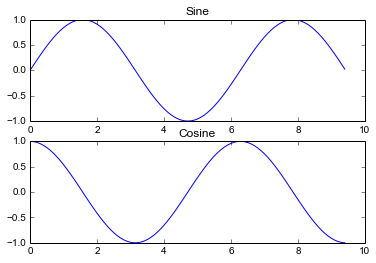

In [86]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Opening images

In [1]:
import numpy as np
import matplotlib.image as mpimg
import skimage.data as fixtures
A = fixtures.camera()

In [2]:
print(type(A))
print(A.shape)
print(A)

<class 'numpy.ndarray'>
(512, 512)
[[156 157 160 ..., 152 152 152]
 [156 157 159 ..., 152 152 152]
 [158 157 156 ..., 152 152 152]
 ..., 
 [121 123 126 ..., 121 113 111]
 [121 123 126 ..., 121 113 111]
 [121 123 126 ..., 121 113 111]]


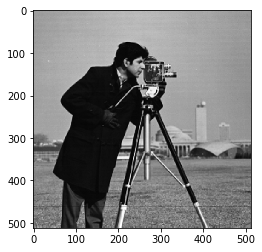

In [59]:
# Visualization is done using imshow / show
import matplotlib.pyplot as plt
plt.imshow(A, cmap="gray") # (returns an argument we can ignore)
plt.show()

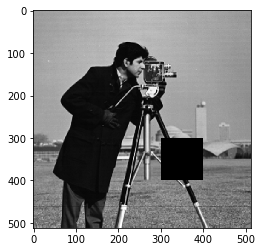

In [60]:
# We can manipulate the image content by manipulating the numpy array
# For example:
A2 = np.copy(A)
A2[300:400, 300:400] = 0
plt.imshow(A2, cmap="gray")
plt.show()

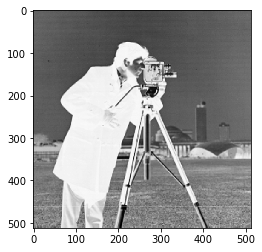

In [61]:
# Application of a simple point transformation
A3 = np.copy(A)
A3 = 255 - A
plt.imshow(A3, cmap="gray")
plt.show()

In [63]:
# Open image from disk
from PIL import Image
B = np.array(Image.open('xaskil1950.png')) # im2arr.shape: height x width x channel
# Check type, shape, print
print(type(B))
print(B.shape)
print(B)

<class 'numpy.ndarray'>
(251, 374)
[[ 88  91  89 ..., 184 184 186]
 [ 77  77  77 ..., 182 181 181]
 [ 79  77  79 ..., 180 179 179]
 ..., 
 [ 61  58  56 ..., 217 217 218]
 [ 88  78  74 ..., 216 218 219]
 [155 145 139 ..., 198 204 208]]


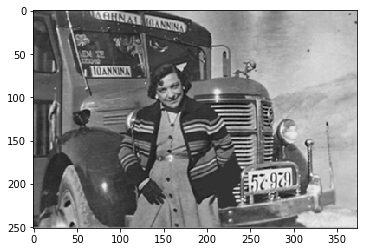

In [64]:
# Show the image
plt.imshow(B, cmap="gray")
plt.show()

In [65]:
# Do some processing again
B2 = np.copy(B)
B2 = np.log(1 + B2)
print(B2)

[[ 4.48828125  4.5234375   4.5        ...,  5.21875     5.21875     5.23046875]
 [ 4.35546875  4.35546875  4.35546875 ...,  5.2109375   5.203125    5.203125  ]
 [ 4.3828125   4.35546875  4.3828125  ...,  5.19921875  5.19140625
   5.19140625]
 ..., 
 [ 4.12890625  4.078125    4.04296875 ...,  5.3828125   5.3828125   5.390625  ]
 [ 4.48828125  4.37109375  4.31640625 ...,  5.37890625  5.390625
   5.39453125]
 [ 5.05078125  4.984375    4.94140625 ...,  5.29296875  5.32421875  5.34375   ]]


[[151 155 152 ..., 225 225 226]
 [138 138 138 ..., 224 223 223]
 [140 138 140 ..., 223 222 222]
 ..., 
 [115 110 106 ..., 242 242 242]
 [151 139 134 ..., 241 242 243]
 [208 201 197 ..., 232 236 238]]


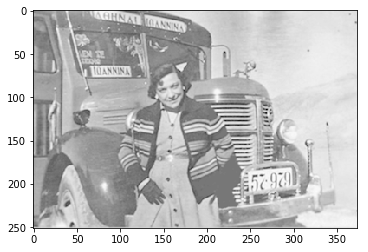

In [67]:
# Normalize back to the original scale
B2 = B2 - np.min(B2)
B2 = np.float32(B2)
B2 = np.round( 255. * (B2 / np.max(B2)) )
B2 = np.uint8(B2) #If we don't do this, we may have a problem when saving
print(B2)
plt.imshow(B2, cmap="gray")
plt.show()

In [68]:
# Save the new image to disk
#Image.fromarray(np.uint8(B2)).save('/tmp/new.png')
Image.fromarray(B2).save('/tmp/new.png')

## Filtering on the frequency domain

(771, 735)
[[ 33  31  29 ...  53  63  43]
 [ 33  31  29 ...  48  51  60]
 [ 33  32  30 ...  56  44  62]
 ...
 [ 27  26  26 ... 143 156 117]
 [ 29  29  29 ... 120 153 143]
 [ 30  30  30 ... 127 180 157]]


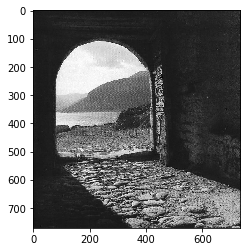

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# Load an image
f = np.array(Image.open('monemvasia1955.png'))
print(f.shape)
print(f)
plt.imshow(f, cmap="gray")
plt.show()

[[44879837.              +0.j         -6397819.22291568-7616824.27085166j
  -3275522.30946675+2643494.55086112j ...
  -1750395.91268998-2859083.00520936j -3275522.30946676-2643494.55086111j
  -6397819.22291565+7616824.27085168j]
 [-2780904.57125419 -361811.8574336j  -5201405.50219333+6293562.12642745j
   2181964.34066935+3465714.88101866j ...
   1537205.25997986+1162690.1552754j   1677816.7652729  +262569.1309701j
   7497544.14530618-6485983.96066744j]
 [-4423178.94911462+5622628.0851604j   1271751.17640415+3699328.11546013j
   1516801.01211505-1934898.53647154j ...
    614019.40317571-1157465.23146256j   311439.77251346+1663490.97598584j
   4634760.34403969-3403006.6442925j ]
 ...
 [ -736876.78617899-5106159.47692758j  -180776.83097448 +168189.84989755j
   2399582.7659841 -1432147.01039894j ...
  -1241379.48778266 +150408.56981685j -1028156.13495051 +474362.61178401j
    697622.39943988+2151389.77437369j]
 [-4423178.94911463-5622628.0851604j   4634760.34403971+3403006.64429247j
    31

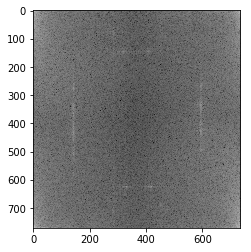

In [54]:
# Import numpy routines to compute the Fourier transform
from numpy.fft import fft2
# Compute the Fourier transform with the fast fourier transform (FFT).
# This is equivalent to computing the DFT, but computationally much faster.
# (Exercise: DIY instead of using the numpy functions, by using Fourier matrices to compute the DFT)
F = fft2(f)
print(F)
plt.imshow(np.log(1+np.abs(F)), cmap="gray")
plt.show()

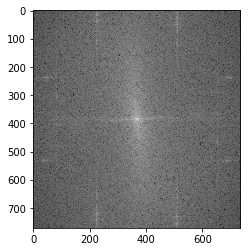

In [55]:
# In order to ease frequency domain manipulations, as well as for more convenient visualisation,
# we shift the zero frequency to the middle of the image:
from numpy.fft import fftshift
Fshifted = fftshift(F)
plt.imshow(np.log(1+np.abs(Fshifted)), cmap="gray")
plt.show()

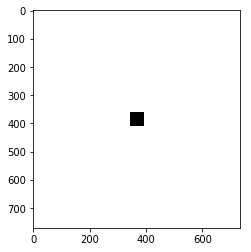

In [56]:
# We'll create a simple low-pass filter. to kanw high
# This filter is known as ideal low-pass filter (ILPF):
H = np.ones_like(F)
spectrum_center = [x // 2 for x in F.shape]
platos = 25
H[spectrum_center[0]-platos:spectrum_center[0]+platos,spectrum_center[1]-platos:spectrum_center[1]+platos] = 0.
plt.imshow(np.log(1+np.abs(H)), cmap="gray")
plt.show()

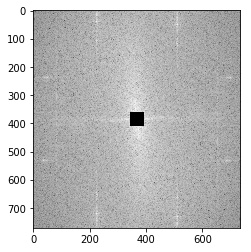

In [57]:
# Filtering is then simply a point-to-point multiplication
Ffiltered_shifted = Fshifted * H
plt.imshow(np.log(1+np.abs(Ffiltered_shifted)), cmap="gray")
plt.show()

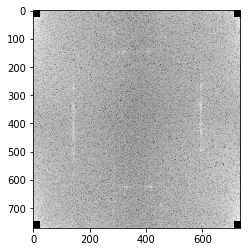

In [58]:
# Shift the zero-frequency back to the top-left corner, since we're done with filtering
from numpy.fft import ifftshift
Ffiltered = ifftshift(Ffiltered_shifted)
plt.imshow(np.log(1+np.abs(Ffiltered)), cmap="gray")
plt.show()

[[ 15.85901612  14.91322804  14.05478252 ...   5.02443263   8.24426598
    8.90109865]
 [ 16.07961446  15.11399005  14.23300978 ...  10.18695877   4.29661618
    8.05693031]
 [ 16.11562433  14.16105811  13.28559766 ...   2.54963928  11.16255931
   10.02193208]
 ...
 [ 20.28461425  18.53097782  15.88003294 ...  87.01323509 102.98079569
   66.89750002]
 [ 18.93095501  16.09945955  13.36439693 ...  63.21916817  99.22029547
   92.18949536]
 [ 18.46410734  15.56757832  12.76280437 ...  69.57629667 125.59833205
  105.60820143]]


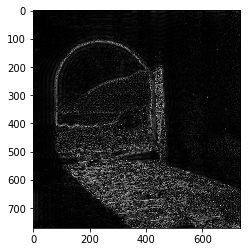

In [59]:
# And now compute the inverse Fourier transform
from numpy.fft import ifft2
# Note that due to numerical error, the ifft2 might have a (small) imaginary component
# Hence we need to explicitly convert the result to a real matrix
f_filtered = np.abs(ifft2(Ffiltered))
# (Again as an exercise, try to replicate this result using Fourier matrices)
print(f_filtered)
plt.imshow(f_filtered, cmap="gray")
plt.show() # note the result of the filter (blur + severe ringing effect)